In [1]:
import geopandas as gpd

blocks_gdf = gpd.read_parquet('./../data/blocks.parquet')[['geometry']]
blocks_gdf.head()

,geometry
id,
0,"POLYGON ((354918.622 6625258.829, 354901.464 6..."
1,"POLYGON ((355412.142 6623378.149, 355411.700 6..."
2,"POLYGON ((353934.329 6625429.433, 353923.453 6..."
3,"POLYGON ((355099.099 6623847.765, 355074.808 6..."
4,"POLYGON ((352766.168 6621954.748, 352744.412 6..."


## Buildings aggregation

In [2]:
buildings_gdf = gpd.read_parquet('./../data/buildings.parquet')[['geometry', 'build_floor_area', 'footprint_area']]
buildings_gdf.head()

,geometry,build_floor_area,footprint_area
id,,,
158414,"POLYGON ((354964.060 6625185.771, 354959.684 6...",15.035234,15.030958
150194,"POLYGON ((355008.167 6625301.606, 355012.344 6...",22.191954,22.185639
58769,"POLYGON ((354878.941 6625544.327, 354882.984 6...",31.272943,31.264070
158321,"POLYGON ((355037.286 6624978.295, 355060.347 6...",158.369888,158.324760
36319,"POLYGON ((354643.688 6625735.942, 354657.286 6...",192.764221,192.709820


In [3]:
from blocksnet.blocks.aggregation import aggregate_objects

blocks_gdf = aggregate_objects(blocks_gdf, buildings_gdf)

2025-03-04 20:30:56.903 | INFO     | blocksnet.blocks.aggregation.core:_validate_input:15 - Validating input.
2025-03-04 20:30:56.905 | INFO     | blocksnet.blocks.aggregation.core:aggregate_objects:88 - Aggregating objects.
100%|██████████| 2/2 [00:07<00:00,  3.84s/it]


In [4]:
blocks_gdf.head()

,geometry,count,build_floor_area,footprint_area
id,,,,
0,"POLYGON ((354918.622 6625258.829, 354901.464 6...",13.0,43840.686518,13953.390266
1,"POLYGON ((355412.142 6623378.149, 355411.700 6...",17.0,10294.395525,5051.410558
2,"POLYGON ((353934.329 6625429.433, 353923.453 6...",5.0,1173.871643,1163.480697
3,"POLYGON ((355099.099 6623847.765, 355074.808 6...",19.0,46303.954706,11085.135352
4,"POLYGON ((352766.168 6621954.748, 352744.412 6...",82.0,125250.533584,40009.654214


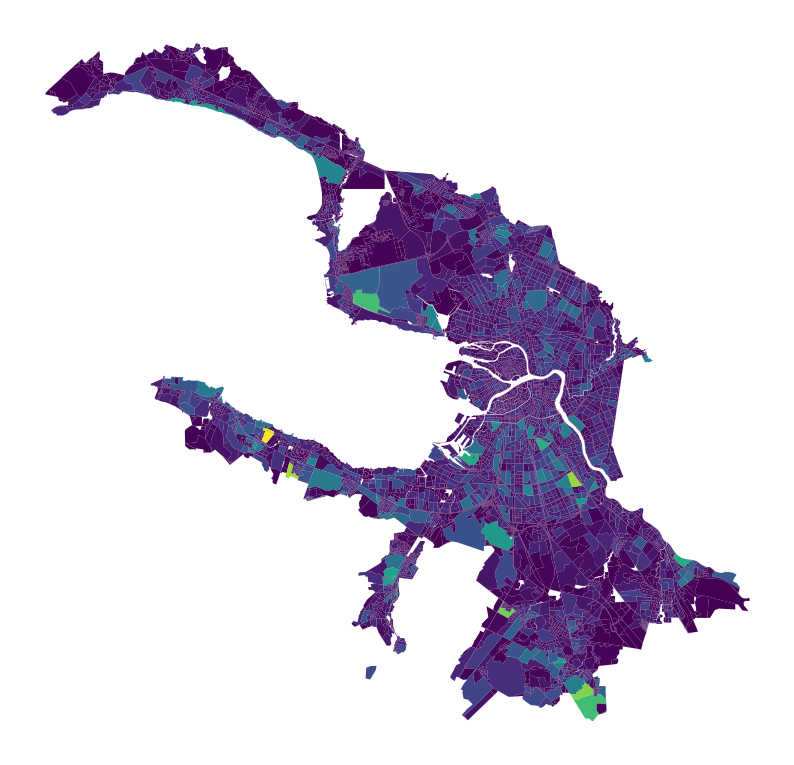

In [5]:
blocks_gdf.plot('count', figsize=(10,10)).set_axis_off()

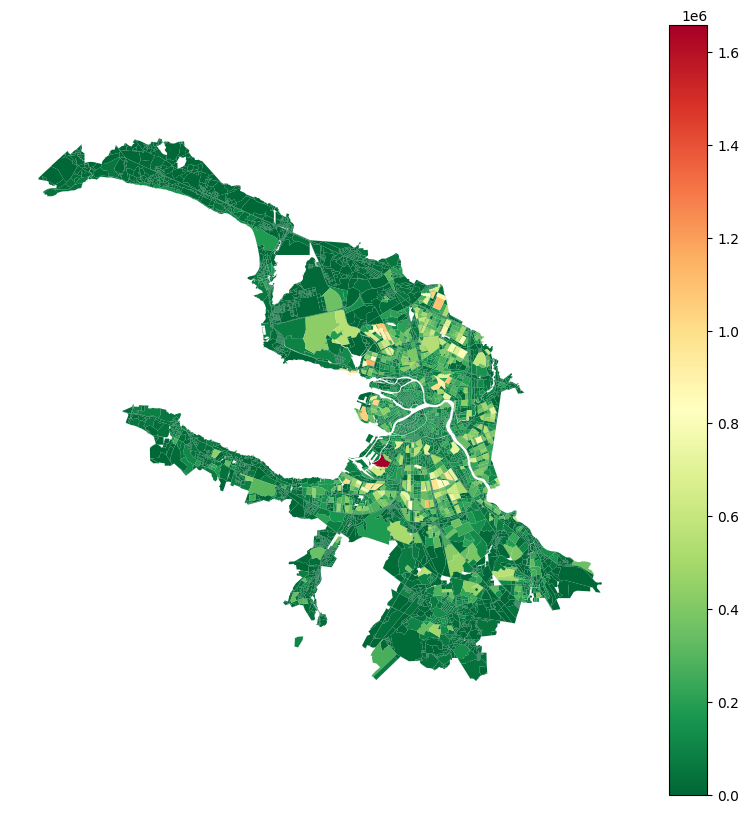

In [6]:
blocks_gdf.plot(column='build_floor_area', legend=True, figsize=(10, 10), cmap='RdYlGn_r').set_axis_off()

## Services aggregation

In [7]:
services_gdf = gpd.read_parquet('./../data/services.parquet')[['geometry', 'capacity', 'service_type']]
services_gdf = services_gdf[services_gdf['service_type'] == 'school']
services_gdf.head()

,geometry,capacity,service_type
89,POINT (344901.025 6636842.991),105,school
123,POINT (344572.765 6637377.808),544,school
421,POINT (343490.888 6636544.706),482,school
613,POINT (337815.236 6630648.737),75,school
650,POINT (355309.295 6618733.164),942,school


In [8]:
blocks_gdf = aggregate_objects(blocks_gdf, services_gdf)

2025-03-04 20:31:09.446 | INFO     | blocksnet.blocks.aggregation.core:_validate_input:15 - Validating input.
2025-03-04 20:31:09.447 | INFO     | blocksnet.blocks.aggregation.core:aggregate_objects:88 - Aggregating objects.
100%|██████████| 1/1 [00:00<00:00,  9.46it/s]


In [9]:
blocks_gdf.head()

,geometry,count,capacity
id,,,
0,"POLYGON ((354918.622 6625258.829, 354901.464 6...",0.0,0.0
1,"POLYGON ((355412.142 6623378.149, 355411.700 6...",0.0,0.0
2,"POLYGON ((353934.329 6625429.433, 353923.453 6...",0.0,0.0
3,"POLYGON ((355099.099 6623847.765, 355074.808 6...",0.0,0.0
4,"POLYGON ((352766.168 6621954.748, 352744.412 6...",0.0,0.0


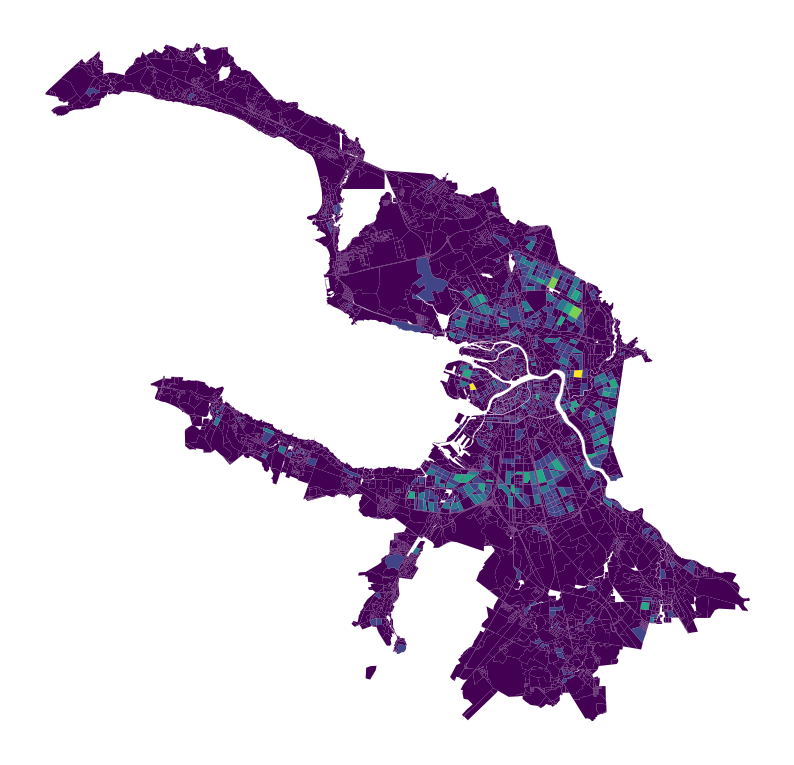

In [12]:
blocks_gdf.plot(column='count', figsize=(10, 10)).set_axis_off()

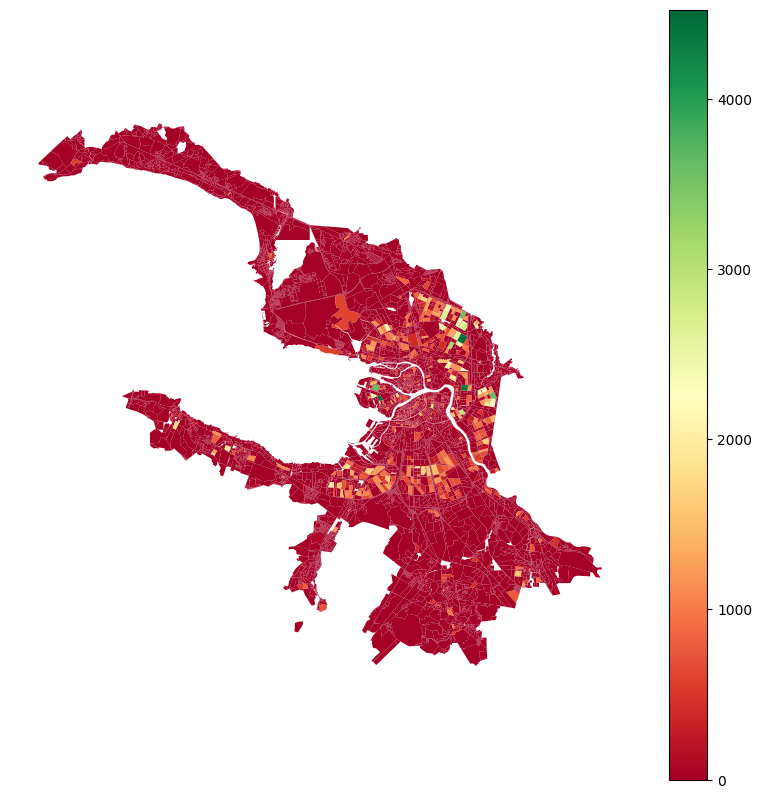

In [10]:
blocks_gdf.plot(column='capacity', legend=True, figsize=(10, 10), cmap='RdYlGn').set_axis_off()